In [86]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [23]:
from scipy.ndimage import uniform_filter1d

In [98]:
hf_path = "/home/joosep/huggingface/particleflow/"

In [99]:
df1 = pandas.read_csv(hf_path + "/clic/clusters/v2.3.0/pyg-clic_20250204_081614_352844/pyg-clic_20250204_081614_352844_runs_train.csv")
df2 = pandas.read_csv(hf_path + "/clic/clusters/v2.3.0/pyg-clic_20250211_145811_219129/pyg-clic_20250211_145811_219129_runs_train.csv")
df3 = pandas.read_csv(hf_path + "/clic/clusters/v2.3.0/pyg-clic_20250130_214007_333962/pyg-clic_20250130_214007_333962_runs_train.csv")

df1["RelTime"] = (df1["Wall time"] - df1["Wall time"][0])/3600
df2["RelTime"] = (df2["Wall time"] - df2["Wall time"][0])/3600
df3["RelTime"] = (df3["Wall time"] - df3["Wall time"][0])/3600

time_window = 20
normval = uniform_filter1d(df3["Value"], time_window)[-1]
df1["Value"] = df1["Value"]/normval
df2["Value"] = df2["Value"]/normval
df3["Value"] = df3["Value"]/normval

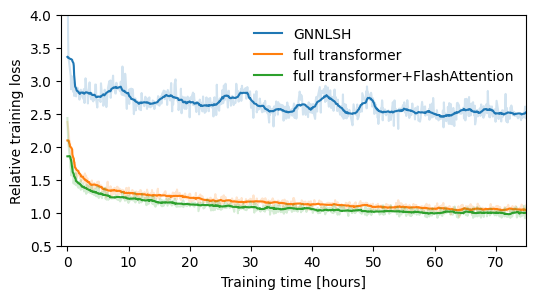

In [100]:
plt.figure(figsize=(6,3))
p = plt.plot(df1["RelTime"], df1["Value"], alpha=0.2)
plt.plot(df1["RelTime"], uniform_filter1d(df1["Value"], time_window), color=p[0].get_color(), label="GNNLSH")

p = plt.plot(df2["RelTime"], df2["Value"], alpha=0.2)
plt.plot(df2["RelTime"], uniform_filter1d(df2["Value"], time_window), color=p[0].get_color(), label="full transformer")

p = plt.plot(df3["RelTime"], df3["Value"], alpha=0.2)
plt.plot(df3["RelTime"], uniform_filter1d(df3["Value"], time_window), color=p[0].get_color(), label="full transformer+FlashAttention")

plt.xlim(-1,75)
plt.ylim(0.5, 4)

plt.legend(loc="best", frameon=False)
plt.ylabel("Relative training loss")
plt.xlabel("Training time [hours]")
plt.savefig("step_train_loss.pdf", bbox_inches="tight")